In [67]:
import pandas as pd

In [520]:
prod_descr=pd.read_excel(r"C:\Users\MY BOOK\Downloads\Customer Raw data.xlsx", sheet_name='Product Description')
prod_perf=pd.read_excel(r"C:\Users\MY BOOK\Downloads\Customer Raw data.xlsx", sheet_name='Product Performance')
query_perf=pd.read_excel(r"C:\Users\MY BOOK\Downloads\Customer Raw data.xlsx", sheet_name='Unbxd Query performance')

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [331]:
#prod_descr.head()
#prod_perf.head()
query_perf.head()

,query,hits,clicks,clickThroughs,ctr,carts,orders
0,pink,3971,330,93,2.34,18,0
1,Chambray,612,1360,447,73.04,145,8
2,gingham in green and white,601,0,0,0.00,0,0
3,white dresses,486,800,310,63.79,73,1
4,grey,480,89,28,5.83,10,0


In [521]:
# Adding a column to the product description displaying the numer of colors in which the product is available.

prod_descr['no of colors']=prod_descr['Color'].apply(lambda x: x.count('/')+1)
prod_descr

,PID,Product Name,Category,Final Price,Initial Price,Color,Primary Color,Fabric,no of colors
0,CL0036386,Ikat stripe print cotton knit dress,Dress,84.95,33.95,Blue/navy/white,Blue,Cotton Spandex,3
1,CL0030567,Feminine pleated knit dress,Dress,59.95,41.95,Navy blue,Navy blue,Cotton Spandex,1
2,CL0032320,Floral embellished chambray denim maxi dress,Dress,96.95,67.95,Deep indigo,Deep indigo,Cotton,1
3,CL0036700,Dot print cap sleeve shirt,Top,49.95,19.95,White/navy,White,Cotton,2
4,CL0036365,Layered asymmetric hem hacci knit top,Top,69.95,27.95,Blue,Blue,Polyester,1
...,...,...,...,...,...,...,...,...,...
711,CL0031288,Ruffle front poplin dress,Dress,69.95,52.95,Spring green,Spring green,Cotton,1
712,CL0032199,Beaded cotton poplin sheath dress,Dress,86.95,65.95,Spring green,Spring green,Cotton,1
713,CL0031267,Embellished stripe waist poplin dress,Dress,76.95,57.95,Spring green multi,Spring green multi,Cotton,1
714,CL0031287,Sash waist poplin skirt,Skirt,59.95,44.95,Spring green,Spring green,Cotton,1


In [522]:
# Adding a column for conversion rates
query_perf['conversion rate']=(query_perf['orders']/query_perf['hits'])*100
query_perf.sort_values(by=['conversion rate'], ascending=False, inplace=True)
query_perf.head()

,query,hits,clicks,clickThroughs,ctr,carts,orders,conversion rate
265,Sash waist chambray dress-Indigo,24,73,11,45.83,28,7,29.166667
340,Chevron stripe colorblock dress-Spring green/b...,20,52,16,80.00,33,5,25.000000
334,Grecian,20,30,13,65.00,18,5,25.000000
485,\tCitron floral print dress,14,18,11,78.57,5,3,21.428571
392,clearance,18,42,11,61.11,16,3,16.666667


In [435]:
query_perf['conversion rate'].mean()

1.3043674136082402

In [436]:
# Creating a list of words in queries from query_perf dataframe which returns high conversion rate:

high_conversion_rate_queries=query_perf[query_perf['conversion rate']>=5]['query'].str.replace('-', ' ').str.split()
high_conversion_rate_queries.head()

265               [Sash, waist, chambray, dress, Indigo]
340    [Chevron, stripe, colorblock, dress, Spring, g...
334                                            [Grecian]
485                       [Citron, floral, print, dress]
392                                          [clearance]
Name: query, dtype: object

In [437]:
length=len(high_conversion_rate_queries)
sum_=0
for q in high_conversion_rate_queries:
    sum_=sum_+len(q)

print('Average number of words in queries that return a conversion rate more than 5:', sum_ /length)    

Average number of words in queries that return a conversion rate more than 5: 3.7


In [438]:
low_conversion_rate_queries=query_perf[query_perf['conversion rate']<5]['query'].str.replace('-', ' ').str.split()
low_conversion_rate_queries.head()
length=len(low_conversion_rate_queries)
sum_=0
for q in low_conversion_rate_queries:
    sum_=sum_+len(q)

print('Average number of words in queries that return a conversion rate less than 5:', sum_ /length)   

Average number of words in queries that return a conversion rate less than 5: 2.126086956521739


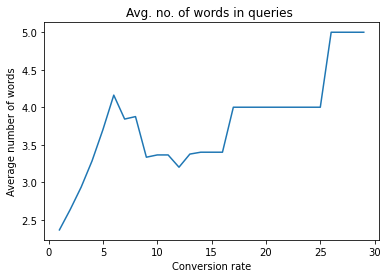

In [439]:
x = []
y = []

for t in range(1, 30, 1):
    high_conversion_rate_queries = query_perf[query_perf['conversion rate'] >= t]['query'].str.replace('-', ' ').str.split()
    length = len(high_conversion_rate_queries)
    sum_ = 0
    for q in high_conversion_rate_queries:
        sum_ = sum_ + len(q)
    j = sum_ / length
    x.append(t)
    y.append(j)
plt.title('Avg. no. of words in queries ')
plt.xlabel('Conversion rate')
plt.ylabel('Average number of words')
plt.plot(x, y)
plt.show()

In [440]:
# Queries with four or more words

four_or_more_wordqueries=query_perf[query_perf['query'].str.replace('-', ' ').str.split().apply(len)>=4]
print('count:', len(four_or_more_wordqueries))
print('Average conversion rate:', four_or_more_wordqueries['conversion rate'].mean())
print('Average ctr:', four_or_more_wordqueries['ctr'].mean())

count: 89
Average conversion rate: 2.563415978632747
Average ctr: 43.1467415730337


In [441]:
# Queries with two or less words

two_or_less_wordqueries=query_perf[query_perf['query'].str.replace('-', ' ').str.split().apply(len)<=2]
print('count', len(two_or_less_wordqueries))
print('Average conversion rate:', two_or_less_wordqueries['conversion rate'].mean())
print('Average ctr:', two_or_less_wordqueries['ctr'].mean())

count 371
Average conversion rate: 0.9570911072594903
Average ctr: 59.81140161725066


In [ ]:
# Observations: 
# 1. Specific search leads to more conversions. So the customers querying non-specifically are not satisfied with 
#    the results.
# 2. The higher average of CTR in queries with fewer words along with low conversion rate could be because the customer 
#    is searching for the product with the required specifications but fails.

# Suggestions:
# While displaying the search results, give preference to the products with high demand if the product description is similar to the query
# Improve the filtering option based on various characteristics of the product.

In [ ]:

# Analyzing queries with high CTR

In [491]:
ctr_mean=query_perf['ctr'].mean()
print('ctr mean:',ctr_mean)
ctr_q3=query_perf['ctr'].quantile(0.75)
print('ctr Q3:',ctr_q3)
ctr_q1=query_perf['ctr'].quantile(0.25)
print('ctr Q1:',ctr_q1)
conversion_rate_mean=query_perf['conversion rate'].mean()
print('conversion rate mean:',conversion_rate_mean)

ctr mean: 56.634
ctr Q3: 71.43
ctr Q1: 42.86
conversion rate mean: 1.3043674136082402


In [473]:
# Selecting the best 25%
#query_perf[query_perf['ctr']>ctr_q3]

In [474]:
#query_perf[query_perf['ctr']<ctr_q3]

In [ ]:
# Queries using color alone

In [445]:
# Distinct colors from products
colors_col=prod_descr['Color'].unique()
colors_col

array([' Blue/navy/white', ' Navy blue', ' Deep indigo', ' White/navy',
       ' Blue', ' Indigo', ' Cream/navy', ' Off-white/teal multi',
       ' White/green/black', ' White/black', ' Sunset yellow/white',
       ' Deep navy', ' White/deep navy', ' Black', ' Black/off-white',
       ' Indigo/black', ' White/pink/black', ' Bottle green',
       ' Tomato red', ' Navy blue/orange', ' Deep gray multi',
       ' Olive/brown/off-white', ' Off-white/deep navy', ' Yellow/white',
       ' Crimson/deep navy', ' Cream multi', ' Bottle green/black',
       ' Citron multi', ' Pink/blue', ' Navy', ' Denim blue',
       ' Navy multi', ' Black/beige', ' Loden green', ' Cream',
       ' Indigo multi', ' Loden/navy/off-white', ' Indigo/red/beige',
       ' Deep indigo/black', ' Beige/black', ' Blue/gold',
       ' Light melange gray', ' Multicolor', ' Deep navy multi',
       ' Heather gray', ' Black multi', ' White/blue', ' Deep navy/cream',
       ' Beige multi', ' Bottle green/deep navy/white', ' D

In [446]:
# Extracting all the colors available across all products 
import numpy as np
result =[]
for s in colors_col:
        words = s.split('/')
        result.extend(words)
colors=np.array(result)
colors=np.array([c.strip().lower() for c in colors])

In [447]:
colors

array(['blue', 'navy', 'white', 'navy blue', 'deep indigo', 'white',
       'navy', 'blue', 'indigo', 'cream', 'navy', 'off-white',
       'teal multi', 'white', 'green', 'black', 'white', 'black',
       'sunset yellow', 'white', 'deep navy', 'white', 'deep navy',
       'black', 'black', 'off-white', 'indigo', 'black', 'white', 'pink',
       'black', 'bottle green', 'tomato red', 'navy blue', 'orange',
       'deep gray multi', 'olive', 'brown', 'off-white', 'off-white',
       'deep navy', 'yellow', 'white', 'crimson', 'deep navy',
       'cream multi', 'bottle green', 'black', 'citron multi', 'pink',
       'blue', 'navy', 'denim blue', 'navy multi', 'black', 'beige',
       'loden green', 'cream', 'indigo multi', 'loden', 'navy',
       'off-white', 'indigo', 'red', 'beige', 'deep indigo', 'black',
       'beige', 'black', 'blue', 'gold', 'light melange gray',
       'multicolor', 'deep navy multi', 'heather gray', 'black multi',
       'white', 'blue', 'deep navy', 'cream', 'bei

In [477]:
# Subsetting color alone queries from query_performance
color_queries = query_perf[query_perf['query'].str.lower().str.strip().isin(colors)]
color_queries.sort_values(by=['hits'], ascending=False)

,query,hits,clicks,clickThroughs,ctr,carts,orders,conversion rate
0,pink,3971,330,93,2.34,18,0,0.000000
7,green,376,723,237,63.03,64,9,2.393617
9,Purple,340,416,151,44.41,29,0,0.000000
14,white,282,610,193,68.44,67,1,0.354610
17,yellow,255,466,146,57.25,42,3,1.176471
31,navy,192,444,128,66.67,29,0,0.000000
39,Black,153,434,110,71.90,43,2,1.307190
66,orange,89,146,44,49.44,4,0,0.000000
77,gold,79,117,46,58.23,19,1,1.265823
81,Teal,75,170,45,60.00,12,0,0.000000


In [481]:
# Finding those colors which are most sought after

c_q3=color_queries['hits'].quantile(0.75)
color_queries[color_queries['hits']>c_q3]['query']

7      green 
39     Black 
17    yellow 
14     white 
0       pink 
66     orange
31       navy
9      Purple
Name: query, dtype: object

In [490]:
print('Avg. conversion rate ', color_queries['conversion rate'].mean())
print('Avg. no. of add to carts ',color_queries['carts'].mean())
print('Avg. CTR ',color_queries['ctr'].mean())


# Observation: The conversion rate for color alone queries is half of that of all queries, while the CTR is slightly lower.
# Also, the CTR is low, so the results for such queries are not engaging.

# Suggestion:
# It is recomendable to include the colors of the products to the products name for better discoverability

Avg. conversion rate  0.5494833977182068
Avg. no. of add to carts  13.09375
Avg. CTR  53.26000000000001


In [ ]:
# Queries using category alone

In [450]:
# Distinct categories from products
categories_col=prod_descr['Category'].unique()
categories=np.array([c.strip().lower() for c in categories_col])
categories=np.concatenate([categories, np.array(['dresses','tops','skirts','pants', 'jumpsuits','jackets'])])

In [483]:
categories

array(['dress', 'top', 'skirt', 'pant', 'jacket', 'jumpsuit', 'dresses',
       'tops', 'skirts', 'pants', 'jumpsuits', 'jackets'], dtype='<U9')

In [451]:
# Subsetting category wise queries from query_performance
categories_queries = query_perf[query_perf['query'].str.lower().str.strip().isin(categories)]
categories_queries

,query,hits,clicks,clickThroughs,ctr,carts,orders,conversion rate
26,Jacket,216,395,108,50.00,29,4,1.851852
89,Jumpsuits,69,88,41,59.42,13,1,1.449275
346,Pants,20,26,14,70.00,0,0,0.000000
458,tops,15,26,10,66.67,7,0,0.000000
30,skirts,199,147,65,32.66,35,0,0.000000


In [484]:
# Examining queries containing both color and category

combinations = []
for w1 in colors:
    for w2 in categories:
        combinations.append(w1 + " " + w2)

print(combinations)


['blue dress', 'blue top', 'blue skirt', 'blue pant', 'blue jacket', 'blue jumpsuit', 'blue dresses', 'blue tops', 'blue skirts', 'blue pants', 'blue jumpsuits', 'blue jackets', 'navy dress', 'navy top', 'navy skirt', 'navy pant', 'navy jacket', 'navy jumpsuit', 'navy dresses', 'navy tops', 'navy skirts', 'navy pants', 'navy jumpsuits', 'navy jackets', 'white dress', 'white top', 'white skirt', 'white pant', 'white jacket', 'white jumpsuit', 'white dresses', 'white tops', 'white skirts', 'white pants', 'white jumpsuits', 'white jackets', 'navy blue dress', 'navy blue top', 'navy blue skirt', 'navy blue pant', 'navy blue jacket', 'navy blue jumpsuit', 'navy blue dresses', 'navy blue tops', 'navy blue skirts', 'navy blue pants', 'navy blue jumpsuits', 'navy blue jackets', 'deep indigo dress', 'deep indigo top', 'deep indigo skirt', 'deep indigo pant', 'deep indigo jacket', 'deep indigo jumpsuit', 'deep indigo dresses', 'deep indigo tops', 'deep indigo skirts', 'deep indigo pants', 'deep 

In [485]:
color_categ_queries = query_perf[query_perf['query'].str.lower().str.strip().isin(combinations)]
color_categ_queries.sort_values(by=['hits'], ascending=False)

,query,hits,clicks,clickThroughs,ctr,carts,orders,conversion rate
3,white dresses,486,800,310,63.79,73,1,0.205761
12,black dresses,303,655,233,76.90,42,2,0.660066
16,Green dresses,259,438,154,59.46,32,1,0.386100
22,Red dress,232,425,147,63.36,43,3,1.293103
32,Blue dresses,181,300,108,59.67,22,1,0.552486
40,purple dress,152,289,104,68.42,22,3,1.973684
45,navy dresses,136,195,84,61.76,18,0,0.000000
48,yellow dresses,129,106,59,45.74,13,1,0.775194
50,Teal dresses,122,25,13,10.66,2,0,0.000000
82,Pink dresses,74,83,33,44.59,6,0,0.000000


In [489]:
print('Avg. conversion rate ', color_categ_queries['conversion rate'].mean())
print('Avg. no. of add to carts', color_categ_queries['carts'].mean())
print('Avg. CTR', color_categ_queries['ctr'].mean())

Avg. conversion rate  0.6420853905270237
Avg. no. of add to carts 14.73913043478261
Avg. CTR 59.29521739130435


In [ ]:
# Observe that for queries containing both color and category, conversion rate is higher.
# Also, higher CTR implies that the results are more engaging

In [492]:

prod_perf.sort_values(by=['orders'], ascending=False, inplace=True)
prod_perf

,pId,pName,clicks,carts,orders
0,CL0034516,Chevron stripe colorblock maxi dress,29144,2181,204
3,CL0032310,Cotton knit fit and flare dress,16234,350,99
2,CL0036758,Bird print pleated cotton knit dress,16343,340,97
5,CL0027567,Elastic waist chambray maxi dress,13234,452,91
9,CL0030370,Pleat waist poplin shirtdress,9571,367,89
...,...,...,...,...,...
2282,CL0035730_OS,Name N/A,11,0,0
2062,CL0035632_OS,Name N/A,20,0,0
2152,CL0035444_OS,Name N/A,17,0,0
2150,CL0036276_OS,Name N/A,17,0,0


In [ ]:
# Investigating whether color diversity has an effect on number of orders

In [493]:
# Extracting top 15% of products with high orders
p85=prod_perf['orders'].quantile(0.85)
p85
top_15_products=prod_perf[prod_perf['orders']>=6]

In [494]:
top_15_prod_descr=pd.merge(top_15_products, prod_descr, left_on='pId', right_on='PID')

top_15_prod_descr.drop(['pId','PID', 'Final Price', 'Initial Price', 'pName'], axis=1, inplace=True)

top_15_prod_descr

,clicks,carts,orders,Product Name,Category,Color,Primary Color,Fabric,no of colors
0,16343,340,97,Seagull print pleated cotton knit dress,Dress,Light blue/white/black,Light blue,Cotton Spandex,3
1,9571,367,89,Pleat waist poplin shirtdress,Dress,Deep navy,Deep navy,Cotton,1
2,8287,247,82,Cotton poplin A-line shirtdress,Dress,Black,Black,Cotton,1
3,8407,227,71,Retro chambray shirtdress,Dress,Indigo,Indigo,Cotton,1
4,25892,237,70,Chevron stripe colorblock maxi dress,Dress,Black/white/eggplant,Black,Cotton,3
...,...,...,...,...,...,...,...,...,...
293,1703,30,6,Tipped trim polka dot chambray shirtdress,Dress,Light indigo/off-white/deep indigo,Light indigo,Cotton,3
294,2312,24,6,Floral scallop drawstring maxi dress,Dress,Deep indigo/white,Deep indigo,Cotton,2
295,727,24,6,Cotton knit elastic drawstring skirt,Skirt,Purple,Purple,Cotton Spandex,1
296,979,20,6,Flutter sleeve gingham check shift dress,Dress,Black/white,Black,Cotton Linen,2


In [495]:
# Proportion of products with respect to the number of colors they are available in: 
prod_descr['no of colors'].value_counts()/prod_descr.shape[0]*100

1    52.513966
2    34.636872
3    11.871508
4     0.977654
Name: no of colors, dtype: float64

In [496]:
# Proportion of products(from the top 15 ordered products)  with respect to the number of colors they are available in: 
top_15_prod_descr['no of colors'].value_counts()/top_15_prod_descr.shape[0]*100

1    54.362416
2    31.879195
3    12.751678
4     1.006711
Name: no of colors, dtype: float64

In [ ]:
# Observe that color diversity doesnt have much impact on sales.

In [ ]:
# CLUSTERING Query_performance

In [527]:
# Scaling the data

from sklearn.preprocessing import StandardScaler

query_perf2=query_perf.copy()
query_perf2=query_perf2.drop(index=279)
new_query_perf=query_perf2[['clicks', 'ctr', 'carts', 'orders']]

new_query_perf=StandardScaler().fit_transform(new_query_perf)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

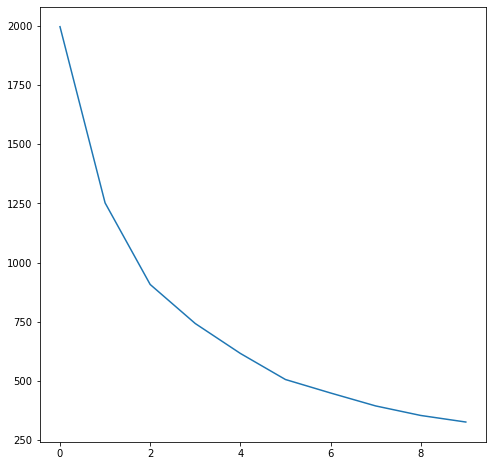

In [528]:
from sklearn.cluster import KMeans
count=list(range(1,11))
distance=list([0]*10)
for i in count:
    clustr_res=KMeans(n_clusters=i, n_init=10).fit(new_query_perf)
    distance[i-1]=clustr_res.inertia_
plt.figure(figsize=(8,8))
plt.plot(distance)

In [221]:
# The elbow point is at k=3, so we proceed with 3 clusters.

In [529]:
new_query_perf.shape

(499, 4)

In [530]:

best_inertia = float('inf')
best_kmeans = None

for i in range(10):
   kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=i).fit(new_query_perf)
   if kmeans.inertia_ < best_inertia:
       best_inertia = kmeans.inertia_
       final_cluster= kmeans
print(best_inertia )






C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Window

907.2686398990002


In [531]:

query_perf2['cluster'] = final_cluster.labels_
query_perf2

,query,hits,clicks,clickThroughs,ctr,carts,orders,conversion rate,cluster
265,Sash waist chambray dress-Indigo,24,73,11,45.83,28,7,29.166667,0
340,Chevron stripe colorblock dress-Spring green/b...,20,52,16,80.00,33,5,25.000000,0
334,Grecian,20,30,13,65.00,18,5,25.000000,1
485,\tCitron floral print dress,14,18,11,78.57,5,3,21.428571,1
392,clearance,18,42,11,61.11,16,3,16.666667,1
...,...,...,...,...,...,...,...,...,...
231,Fruit,28,49,17,60.71,4,0,0.000000,1
229,georgette,29,77,17,58.62,7,0,0.000000,1
228,CL0032310,29,66,13,44.83,38,0,0.000000,2
227,Loden Green,29,48,21,72.41,4,0,0.000000,1


In [532]:
qp_cluster_0=query_perf2[query_perf2['cluster']==0];print(qp_cluster_0.shape)
qp_cluster_1=query_perf2[query_perf2['cluster']==1];print(qp_cluster_1.shape)
qp_cluster_2=query_perf2[query_perf2['cluster']==2];print(qp_cluster_2.shape)
print()

(45, 9)
(284, 9)
(170, 9)



In [309]:
qp_cluster_0.describe()

,hits,clicks,clickThroughs,ctr,carts,orders,conversion rate,cluster
count,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.000000,430.0
mean,44.862791,58.604651,18.325581,55.509767,7.927907,0.253488,0.874693,0.0
std,195.380084,50.730395,14.770696,20.257996,8.981302,0.531896,2.202373,0.0
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,18.000000,24.000000,9.000000,40.767500,2.000000,0.000000,0.000000,0.0
50%,24.000000,42.000000,13.000000,60.000000,6.000000,0.000000,0.000000,0.0
75%,39.000000,76.750000,24.000000,71.430000,11.000000,0.000000,0.000000,0.0
max,3971.000000,330.000000,99.000000,100.000000,53.000000,3.000000,21.428571,0.0


In [534]:
qp_cluster_1.describe()

,hits,clicks,clickThroughs,ctr,carts,orders,conversion rate,cluster
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.0
mean,38.577465,81.088028,25.718310,68.545246,10.845070,0.457746,1.406299,1.0
std,34.245904,68.360528,20.492993,10.048794,10.570508,0.850053,3.236197,0.0
min,14.000000,12.000000,8.000000,44.410000,0.000000,0.000000,0.000000,1.0
25%,19.000000,36.750000,13.000000,61.110000,2.750000,0.000000,0.000000,1.0
50%,27.000000,56.000000,19.000000,67.625000,8.000000,0.000000,0.000000,1.0
75%,44.250000,107.500000,30.000000,75.000000,15.250000,1.000000,1.526989,1.0
max,340.000000,444.000000,151.000000,100.000000,53.000000,5.000000,25.000000,1.0


In [535]:
qp_cluster_2.describe()

,hits,clicks,clickThroughs,ctr,carts,orders,conversion rate,cluster
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.0
mean,61.800000,38.041176,10.929412,34.101588,5.370588,0.211765,0.727500,2.0
std,309.304404,41.351911,11.498174,12.235403,6.669569,0.567234,1.854974,0.0
min,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,16.250000,14.000000,6.000000,25.970000,0.000000,0.000000,0.000000,2.0
50%,21.500000,24.500000,8.000000,35.710000,4.000000,0.000000,0.000000,2.0
75%,33.000000,45.500000,12.000000,43.722500,7.000000,0.000000,0.000000,2.0
max,3971.000000,330.000000,93.000000,52.940000,38.000000,4.000000,8.695652,2.0


In [ ]:
# Examining 'hits' in each clusters

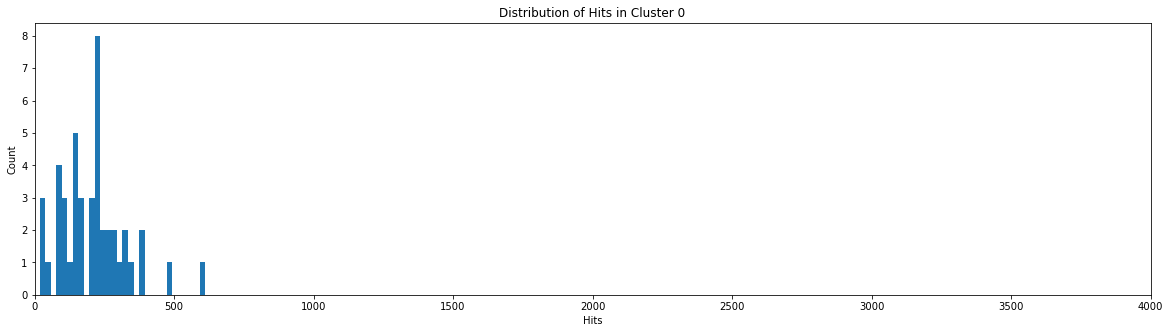

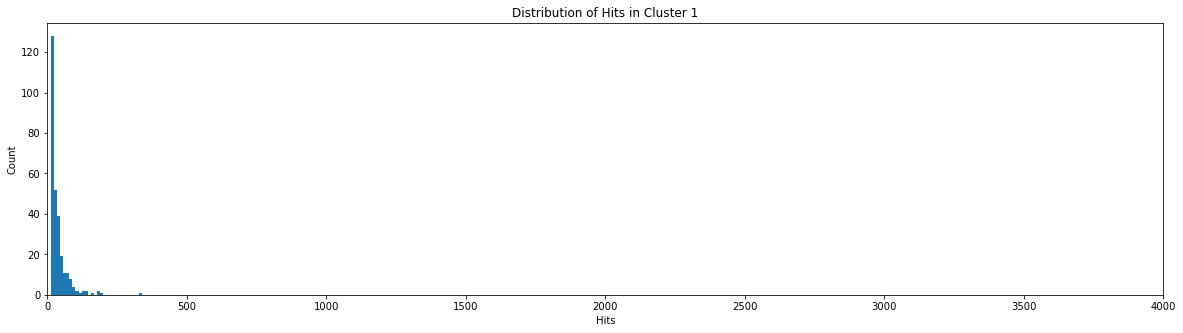

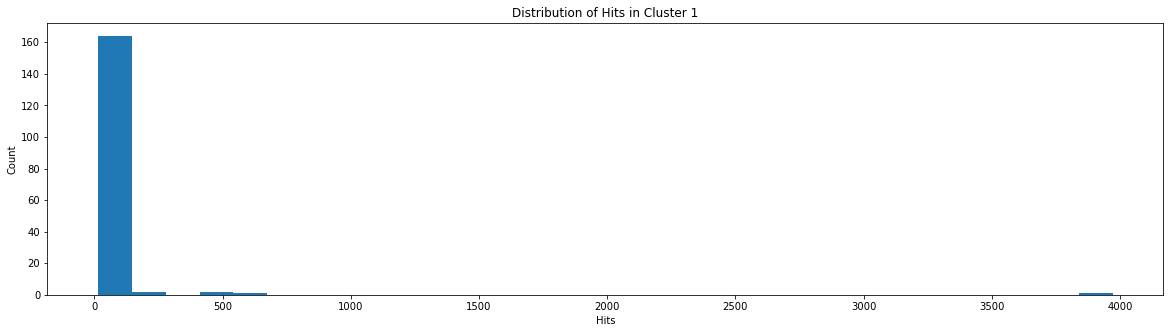

In [538]:
# Hits in 0th cluster
plt.figure(figsize=(20,5))
plt.hist(qp_cluster_0['hits'], bins=30)
plt.xlabel('Hits')
plt.ylabel('Count')
plt.title('Distribution of Hits in Cluster 0')
plt.xlim(0, 4000)
plt.show()

# Hits in 1th cluster
plt.figure(figsize=(20,5))
plt.hist(qp_cluster_1['hits'], bins=30)
plt.xlabel('Hits')
plt.ylabel('Count')
plt.title('Distribution of Hits in Cluster 1')
plt.xlim(0, 4000)
plt.show()

# Hits in 1th cluster
plt.figure(figsize=(20,5))
plt.hist(qp_cluster_2['hits'], bins=30)
plt.xlabel('Hits')
plt.ylabel('Count')
plt.title('Distribution of Hits in Cluster 1')
#plt.xlim(0, 4000)
plt.show()

In [245]:
# Cluster 0 has queries which returned less than 100 hits, whereas 

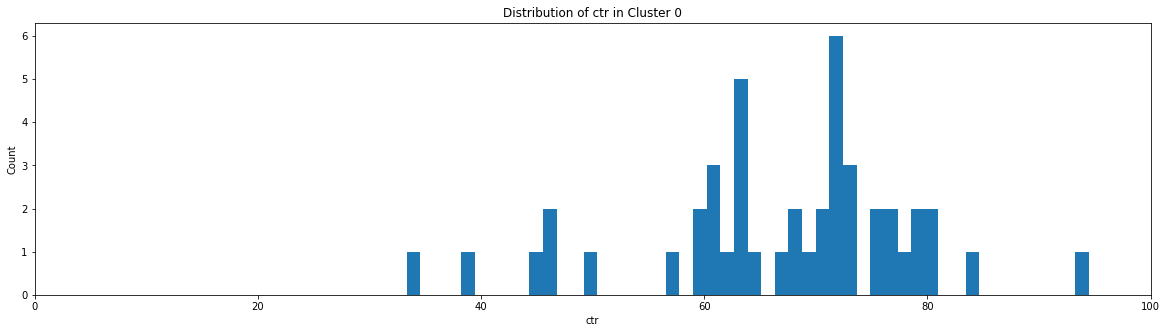

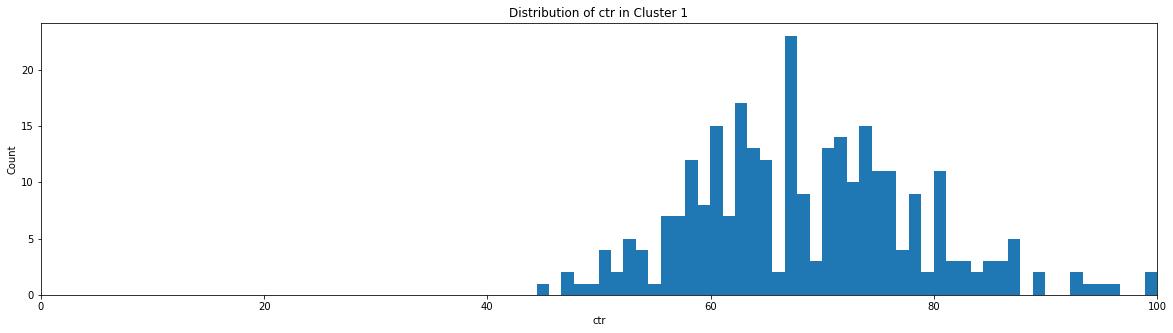

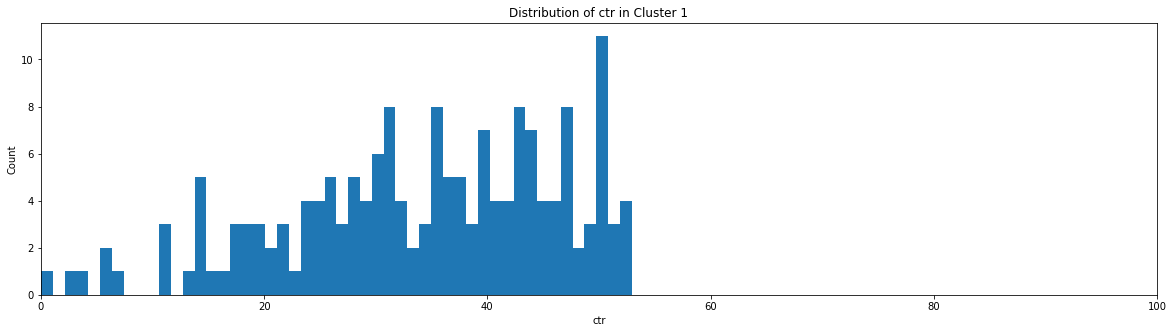

In [539]:
# CTR in clusters
plt.figure(figsize=(20,5))
plt.hist(qp_cluster_0['ctr'], bins=50)
plt.xlabel('ctr')
plt.ylabel('Count')
plt.title('Distribution of ctr in Cluster 0')
plt.xlim(0, 100)
plt.show()

# Hits in 1th cluster
plt.figure(figsize=(20,5))
plt.hist(qp_cluster_1['ctr'], bins=50)
plt.xlabel('ctr')
plt.ylabel('Count')
plt.title('Distribution of ctr in Cluster 1')
plt.xlim(0, 100)
plt.show()

# Hits in 1th cluster
plt.figure(figsize=(20,5))
plt.hist(qp_cluster_2['ctr'], bins=50)
plt.xlabel('ctr')
plt.ylabel('Count')
plt.title('Distribution of ctr in Cluster 1')
plt.xlim(0, 100)
plt.show()


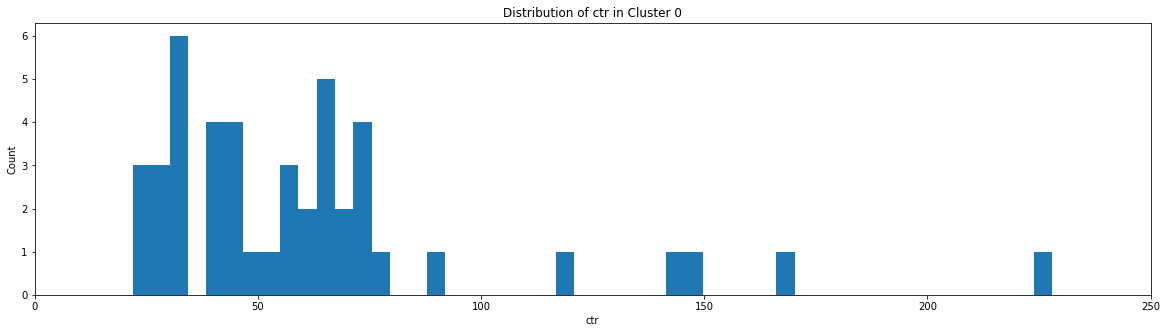

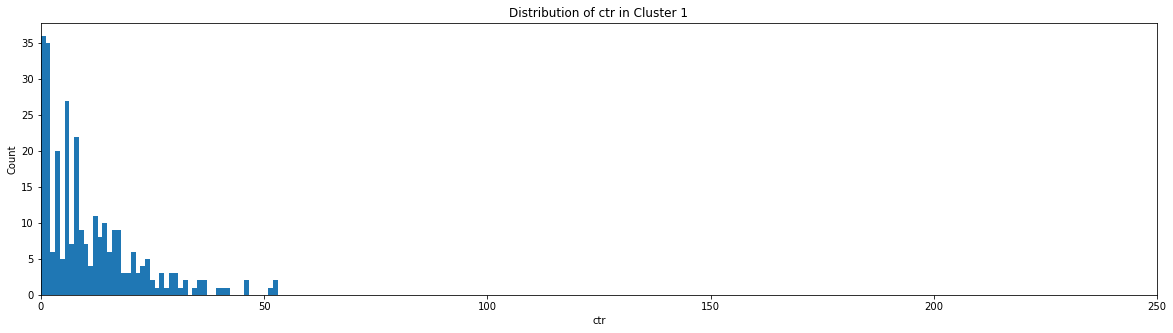

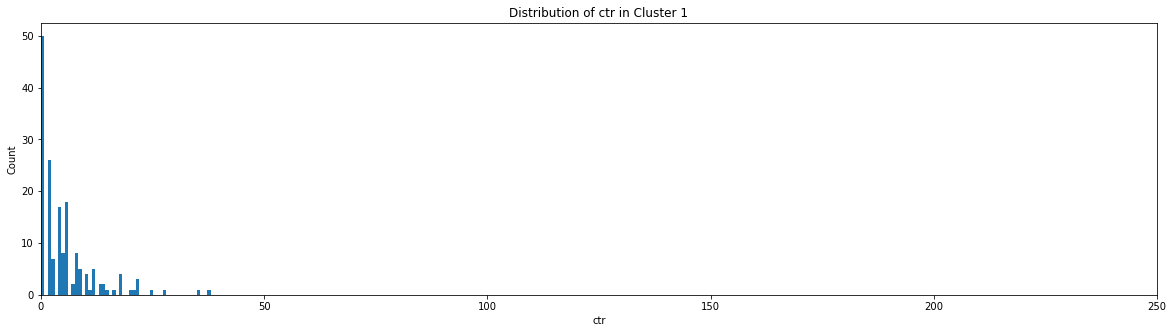

In [542]:
# cart in clusters
plt.figure(figsize=(20,5))
plt.hist(qp_cluster_0['carts'], bins=50)
plt.xlabel('ctr')
plt.ylabel('Count')
plt.title('Distribution of ctr in Cluster 0')
plt.xlim(0, 250)
plt.show()

# Hits in 1th cluster
plt.figure(figsize=(20,5))
plt.hist(qp_cluster_1['carts'], bins=50)
plt.xlabel('ctr')
plt.ylabel('Count')
plt.title('Distribution of ctr in Cluster 1')
plt.xlim(0, 250)
plt.show()

# Hits in 1th cluster
plt.figure(figsize=(20,5))
plt.hist(qp_cluster_2['carts'], bins=50)
plt.xlabel('ctr')
plt.ylabel('Count')
plt.title('Distribution of ctr in Cluster 1')
plt.xlim(0, 250)
plt.show()

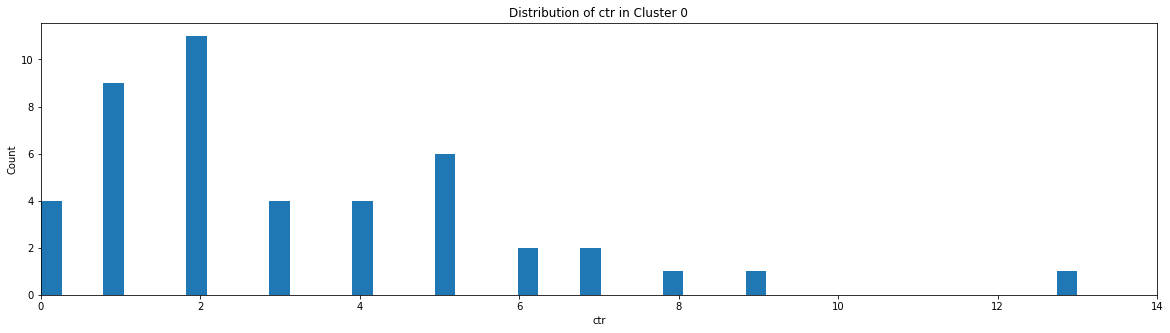

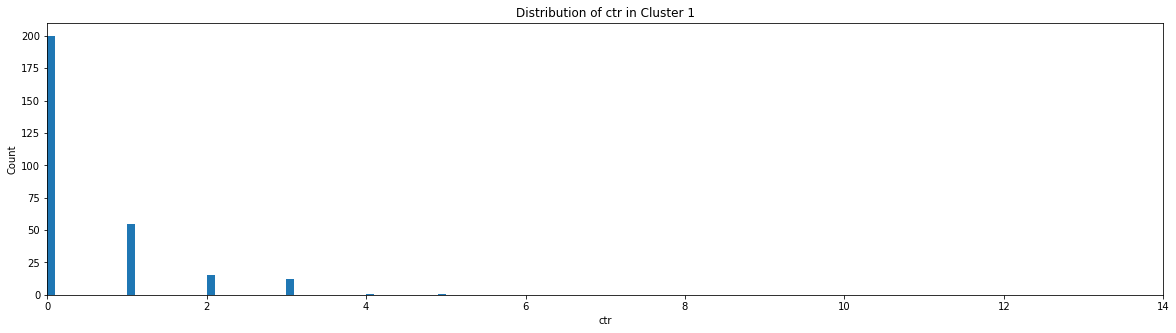

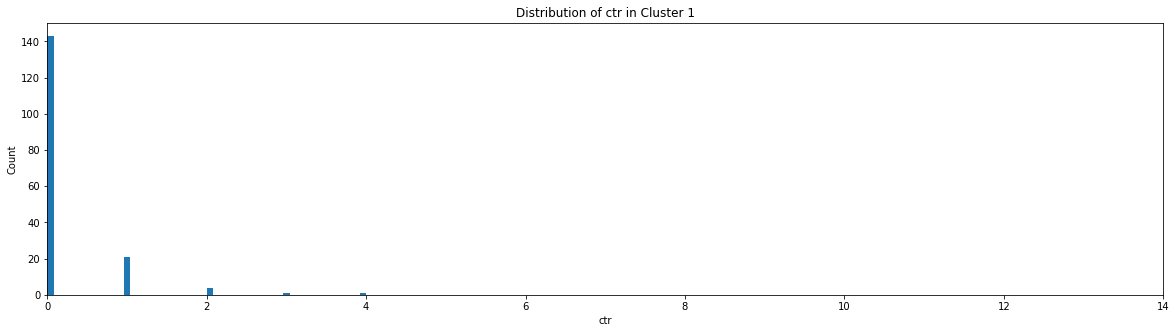

In [541]:
# order in clusters
plt.figure(figsize=(20,5))
plt.hist(qp_cluster_0['orders'], bins=50)
plt.xlabel('ctr')
plt.ylabel('Count')
plt.title('Distribution of ctr in Cluster 0')
plt.xlim(0, 14)
plt.show()

# Hits in 1th cluster
plt.figure(figsize=(20,5))
plt.hist(qp_cluster_1['orders'], bins=50)
plt.xlabel('ctr')
plt.ylabel('Count')
plt.title('Distribution of ctr in Cluster 1')
plt.xlim(0, 14)
plt.show()

# Hits in 1th cluster
plt.figure(figsize=(20,5))
plt.hist(qp_cluster_2['orders'], bins=50)
plt.xlabel('ctr')
plt.ylabel('Count')
plt.title('Distribution of ctr in Cluster 1')
plt.xlim(0, 14)
plt.show()